# 用pytorch搭建全连接神经网络，对Fashion-MNIST数据集中的时尚物品进行分类

## 概要
本课，你将通过业界知名的深度学习框架pytorch搭建四层全连接神经网络，分析Fashion-MNIST数据集中的六万张训练集图片和一万张测试集图片，观察训练误差和验证误差随训练代数提高的变化。
首先搭建普通的四层全连接神经网络，训练后发现过拟合明显。
通过Dropout方法，减少过拟合。
你将掌握图像多分类、准确率与误差分析、搭建全连接神经网络并通过Adam算法进行梯度下降训练，最重要的是，熟悉pytorch这一简洁明快的深度学习工具。

Github：[zihaopytorch](https://github.com/TommyZihao/zihaopytorch)<br>

![Fashion-MNIST时尚物品数据集](https://upload-images.jianshu.io/upload_images/13714448-e0d2b1be2bb1702e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 作者

张子豪 同济大学研究生 2019-06-06

Bilibili视频教程：[同济子豪兄](https://space.bilibili.com/1900783/#/)<br>

知乎专栏：[人工智能小技巧](https://zhuanlan.zhihu.com/c_1032626015746502656)<br>

简书专栏：[人工智能小技巧](https://www.jianshu.com/u/38cccf09b515)<br>


# 粉丝答疑交流QQ群：953712961


# 微信赞赏码

![子豪兄的赞赏码](https://upload-images.jianshu.io/upload_images/13714448-bec288cb077c7f08.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

# 0.安装pytorch

## 0.1下载pytorch
打开pytorch[官网](https://pytorch.org/get-started/locally/)，选择对应操作系统、python版本、python包管理器和CUDA版本的pytorch，界面上会自动生成你需要运行的命令行。
例如，我是Windows64位、python3.7，使用pip作为python包管理器，不需要CUDA，我的界面长这个样子
![pytorch下载界面](https://upload-images.jianshu.io/upload_images/13714448-579e4ad805844c95.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

按界面提示，我需要在操作系统命令行中运行以下两条命令：<br>

`pip3 install https://download.pytorch.org/whl/cpu/torch-1.1.0-cp37-cp37m-win_amd64.whl`

`pip3 install https://download.pytorch.org/whl/cpu/torchvision-0.3.0-cp37-cp37m-win_amd64.whl`

## 0.2验证安装成功

运行下面的代码单元，如果正常就说明pytorch安装成功啦！

In [1]:
import torch

In [2]:
torch.__version__

'2.5.0'

In [3]:
# 上面单元格的运行结果：pytorch的版本号

# 1 下载Fasion-MNIST数据集

`Fashion-MNIST`是一个替代原始的[MNIST手写数字数据集](http://yann.lecun.com/exdb/mnist/)的`另一个`图像数据集。 它是由Zalando（一家德国的时尚科技公司）旗下的[研究部门](https://research.zalando.com/)提供。其涵盖了来自10种类别的共7万个不同商品的正面图片。Fashion-MNIST的大小、格式和训练集/测试集划分与原始的MNIST完全一致。60000/10000的训练测试数据划分，28x28的灰度图片。你可以直接用它来测试你的机器学习和深度学习算法性能，且**不需要**改动任何的代码。

Fashion-MNIST 数据集的[中文文档说明](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.zh-CN.md)


In [4]:
import torch  # 导入pytorch
from torch import nn, optim  # 导入神经网络与优化器对应的类
import torch.nn.functional as F 
from torchvision import datasets, transforms ## 导入数据集与数据预处理的方法

In [5]:
# 数据预处理：标准化图像数据，使得灰度数据在-1到+1之间
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

# 下载Fashion-MNIST训练集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序
trainset = datasets.FashionMNIST('dataset/', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 下载Fashion-MNIST测试集数据，并构建测试集数据载入器trainloader,每次从测试集中载入64张图片，每次载入都打乱顺序
testset = datasets.FashionMNIST('dataset/', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

在机器学习中，"transform"可能指的是数据预处理步骤，其中原始数据被转换成适合模型训练的格式。这可能包括归一化、标准化、编码类别特征等。

In [6]:
image, label = next(iter(trainloader))
image.shape

torch.Size([64, 1, 28, 28])

## 显示图片

<class 'torch.Tensor'>
这张图片对应的标签是 靴子


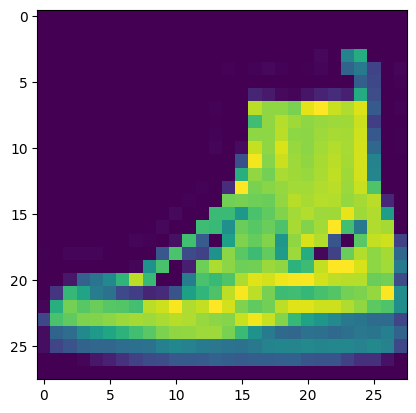

In [7]:
image, label = next(iter(trainloader))

# image图片中有64张图片，我们查看索引为2的图片
imagedemo = image[3]
imagedemolabel = label[3]

imagedemo = imagedemo.reshape((28,28))
print(type(imagedemo))

import matplotlib.pyplot as plt
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

# 2 打开数据集中的图片

In [8]:
image, label = next(iter(trainloader))

In [9]:
image.shape

torch.Size([64, 1, 28, 28])

image包含了64张28 * 28的灰度图片，1代表单通道，也就是灰度

In [10]:
label

tensor([8, 6, 1, 2, 3, 6, 2, 5, 5, 3, 4, 9, 1, 4, 0, 8, 5, 1, 9, 8, 2, 5, 2, 9,
        9, 2, 9, 1, 2, 3, 1, 9, 1, 6, 3, 5, 5, 6, 0, 9, 1, 3, 6, 2, 5, 3, 7, 5,
        6, 6, 8, 8, 0, 2, 6, 1, 5, 5, 6, 2, 6, 9, 9, 9])

label包含了image里面64张图片对应的标签

| 标注编号 | 描述 |
| --- | --- |
| 0 | T-shirt/top（T恤）|
| 1 | Trouser（裤子）|
| 2 | Pullover（套衫）|
| 3 | Dress（裙子）|
| 4 | Coat（外套）|
| 5 | Sandal（凉鞋）|
| 6 | Shirt（汗衫）|
| 7 | Sneaker（运动鞋）|
| 8 | Bag（包）|
| 9 | Ankle boot（踝靴）|

## 打开训练集中的一张图片看看

In [11]:
imagedemo = image[2]
imagedemolabel = label[2]

In [12]:
imagedemo.shape

torch.Size([1, 28, 28])

In [13]:
imagedemo = imagedemo.reshape((28,28))

In [14]:
imagedemo.shape

torch.Size([28, 28])

In [15]:
imagedemolabel

tensor(1)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

这张图片对应的标签是 裤子


## 查看一张图片和标签完整的代码

In [18]:
image, label = next(iter(trainloader))

# image图片中有64张图片，我们查看索引为2的图片  
imagedemo = image[3]
imagedemolabel = label[3]

imagedemo = imagedemo.reshape((28,28))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

这张图片对应的标签是 裙子


# 2 搭建并训练四层全连接神经网络

神经网络的输入为28 * 28 = 784 个像素<br>
第一个隐含层包含256个神经元<br>
第二个隐含层包含128个神经元<br>
第三个隐含层包含64个神经元<br>
输出层输出10个结果，对应图片的10种分类<br>

![全连接神经网络](https://upload-images.jianshu.io/upload_images/13714448-c8b5fa11504798bf.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [19]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [20]:
# 对上面定义的Classifier类进行实例化
model = Classifier()

# 定义损失函数为负对数损失函数
criterion = nn.NLLLoss()

# 优化方法为Adam梯度下降方法，学习率为0.003
optimizer = optim.Adam(model.parameters(), lr=0.003)

# 对训练集的全部数据学习15遍，这个数字越大，训练时间越长
epochs = 15

# 将每次训练的训练误差和测试误差存储在这两个列表里，后面绘制误差变化折线图用
train_losses, test_losses = [], []

print('开始训练')
for e in range(epochs):
    running_loss = 0
    
    # 对训练集中的所有图片都过一遍
    for images, labels in trainloader:
        # 将优化器中的求导结果都设为0，否则会在每次反向传播之后叠加之前的
        optimizer.zero_grad()
        
        # 对64张图片进行推断，计算损失函数，反向传播优化权重，将损失求和
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # 每次学完一遍数据集，都进行以下测试操作
    else:
        test_loss = 0
        accuracy = 0
        # 测试的时候不需要开自动求导和反向传播
        with torch.no_grad():
            # 关闭Dropout
            model.eval()
            
            # 对测试集中的所有图片都过一遍
            for images, labels in testloader:
                # 对传入的测试集图片进行正向推断、计算损失，accuracy为测试集一万张图片中模型预测正确率
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # 等号右边为每一批64张测试图片中预测正确的占比
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        # 恢复Dropout
        model.train()
        # 将训练误差和测试误差存在两个列表里，后面绘制误差变化折线图用
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("训练集学习次数: {}/{}.. ".format(e+1, epochs),
              "训练误差: {:.3f}.. ".format(running_loss/len(trainloader)),
              "测试误差: {:.3f}.. ".format(test_loss/len(testloader)),
              "模型分类准确率: {:.3f}".format(accuracy/len(testloader)))

开始训练
训练集学习次数: 1/15..  训练误差: 0.515..  测试误差: 0.470..  模型分类准确率: 0.827
训练集学习次数: 2/15..  训练误差: 0.393..  测试误差: 0.421..  模型分类准确率: 0.848
训练集学习次数: 3/15..  训练误差: 0.354..  测试误差: 0.399..  模型分类准确率: 0.857
训练集学习次数: 4/15..  训练误差: 0.334..  测试误差: 0.384..  模型分类准确率: 0.861
训练集学习次数: 5/15..  训练误差: 0.317..  测试误差: 0.368..  模型分类准确率: 0.867
训练集学习次数: 6/15..  训练误差: 0.303..  测试误差: 0.352..  模型分类准确率: 0.870
训练集学习次数: 7/15..  训练误差: 0.292..  测试误差: 0.360..  模型分类准确率: 0.872
训练集学习次数: 8/15..  训练误差: 0.281..  测试误差: 0.363..  模型分类准确率: 0.872
训练集学习次数: 9/15..  训练误差: 0.275..  测试误差: 0.371..  模型分类准确率: 0.877
训练集学习次数: 10/15..  训练误差: 0.264..  测试误差: 0.357..  模型分类准确率: 0.878
训练集学习次数: 11/15..  训练误差: 0.260..  测试误差: 0.344..  模型分类准确率: 0.882
训练集学习次数: 12/15..  训练误差: 0.255..  测试误差: 0.362..  模型分类准确率: 0.876
训练集学习次数: 13/15..  训练误差: 0.248..  测试误差: 0.376..  模型分类准确率: 0.878
训练集学习次数: 14/15..  训练误差: 0.242..  测试误差: 0.365..  模型分类准确率: 0.879
训练集学习次数: 15/15..  训练误差: 0.234..  测试误差: 0.354..  模型分类准确率: 0.882


In [ ]:
with open('../images/bag1.png') as file:
    model.forward(file)
    model

# 3 验证模型效果

## 绘制训练误差和测试误差随学习次数增加的变化

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

可以看到，虽然训练误差一直在下降，但测试误差居高不下，我们的神经网络仿佛一个高分低能的同学，平时把所有课后题答案都死记硬背下来，一到考试见到新题的时候就不会做了。

虽然高分低能，但大部分时候依旧能做出正确判断，但是有时候预测概率只有百分之三四十的把握，不能做到十有八九的确定。

In [23]:
dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

In [24]:
# 将测试图片转为一维的列向量
img = torch.from_numpy(img)
img = img.view(1, 784)
print(img.shape[0])
# img = img.view(img.shape[0], -1)


1


In [25]:

# 进行正向推断，预测图片所在的类别
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
prediction = labellist[top_class]
probability = float(top_p)
print(f'神经网络猜测图片里是 {prediction}，概率为{probability*100}%')

神经网络猜测图片里是 套衫，概率为99.62049126625061%


# 4 采用Dropout方法防止过拟合

我们可以采用Dropout的方法，也就是在每次正向推断训练神经元的时候随机“掐死”一部分神经元，阻断其输入输出，这样可以起到正则化的作用。

可以理解为，皇上雨露均沾，今天受宠，明天可能就被打入冷宫，这样就防止了杨贵妃那样的“三千宠爱在一身”，从而防止了某些神经元一家独大，成为话题领袖，只手遮天。

所有神经元处于平等地位，防止过拟合。

In [26]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # 构造Dropout方法，在每次训练过程中都随机“掐死”百分之二十的神经元，防止过拟合。
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)
        
        # 在训练过程中对隐含层神经元的正向推断使用Dropout方法
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # 在输出单元不需要使用Dropout方法
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
# 对上面定义的Classifier类进行实例化
model = Classifier()

# 定义损失函数为负对数损失函数
criterion = nn.NLLLoss()

# 优化方法为Adam梯度下降方法，学习率为0.003
optimizer = optim.Adam(model.parameters(), lr=0.003)

# 对训练集的全部数据学习15遍，这个数字越大，训练时间越长
epochs = 15

# 将每次训练的训练误差和测试误差存储在这两个列表里，后面绘制误差变化折线图用
train_losses, test_losses = [], []

print('开始训练')
for e in range(epochs):
    running_loss = 0
    
    # 对训练集中的所有图片都过一遍
    for images, labels in trainloader:
        # 将优化器中的求导结果都设为0，否则会在每次反向传播之后叠加之前的
        optimizer.zero_grad()
        
        # 对64张图片进行推断，计算损失函数，反向传播优化权重，将损失求和
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # 每次学完一遍数据集，都进行以下测试操作
    else:
        test_loss = 0
        accuracy = 0
        # 测试的时候不需要开自动求导和反向传播
        with torch.no_grad():
            # 关闭Dropout
            model.eval()
            
            # 对测试集中的所有图片都过一遍
            for images, labels in testloader:
                # 对传入的测试集图片进行正向推断、计算损失，accuracy为测试集一万张图片中模型预测正确率
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # 等号右边为每一批64张测试图片中预测正确的占比
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        # 恢复Dropout
        model.train()
        # 将训练误差和测试误差存在两个列表里，后面绘制误差变化折线图用
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("训练集学习次数: {}/{}.. ".format(e+1, epochs),
              "训练误差: {:.3f}.. ".format(running_loss/len(trainloader)),
              "测试误差: {:.3f}.. ".format(test_loss/len(testloader)),
              "模型分类准确率: {:.3f}".format(accuracy/len(testloader)))

开始训练


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

可以看到，训练误差和测试误差都随学习次数增加逐渐降低，没有出现“高分低能”和“死记硬背”的过拟合现象，这其实是Dropout正则化的功劳。

In [ ]:
model.eval()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

# 将测试图片转为一维的列向量
img = torch.from_numpy(img)
img = img.view(1, 784)

# 进行正向推断，预测图片所在的类别
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
prediction = labellist[top_class]
probability = float(top_p)
print(f'神经网络猜测图片里是 {prediction}，概率为{probability*100}%')